## We need to identify the digit in given images

### Importing essentials

In [1]:
import pandas as pd
import os
import warnings
os.chdir('/home/admin293/vaibhav/PycharmProjects/Machine Learning using libraries/Classification/Datasets & pickled objects/')
warnings.filterwarnings("ignore")

# importing essentials from tensorflow library for CNN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### Building Convolutional Neural Network model

In [2]:
# configuring model as sequential
classifier = Sequential()

# step 1 convolutional layer: to make build feature maps using feature detectors & removing linearity using relu
classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))

# setp 2 maxpool layer: to build pooled feaure map to accomodate invariance in tilt/flip/orientation still catch feature
# reducing size with maxpooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# repeating steps 1 & 2 to make features more prominent for classification
classifier.add(Conv2D(64, 3, 3, activation='relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

# step 3 flatteing: to get flattened long vector of these values to be passed as inputs to neural network 
classifier.add(Flatten())

classifier.add(Dropout(0.3))

# Step 4 Building neural network: learning patterns in given inputs using dense ntwork
# input to neural network
classifier.add(Dense(64, activation='relu'))

# output layer
classifier.add(Dense(10, activation='sigmoid'))

# setting parameters such as optmizing algo, loss fn, evaluation formula for classifier model  
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Creating dataframe for image address & class label

In [3]:
dataset = pd.read_csv('Identify-numbers/train.csv')

for index in range(len(dataset)):
    dataset['filename'][index] = 'Identify-numbers/train/' + dataset['filename'][index]  

dataset = dataset.astype(str)

#### Splitting dataset into train set & test set

In [4]:
train_dataset = dataset[:35000]
test_dataset = dataset[35000:]
test_dataset = test_dataset.reset_index()

### Image Preprocessing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# converting image to 3D matrices & scaling as well
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2)
# defining necessary scaling for test set images same as train set images
test_datagen = ImageDataGenerator(rescale=1./255)

# loading images into train set from directory & defining iamge pixel-size 
training_set = train_datagen.flow_from_dataframe(dataframe=train_dataset,
                                                x_col='filename',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='categorical',
                                                y_col='label')

# loading images into train set from directory & defining iamge pixel-size 
test_set = test_datagen.flow_from_dataframe(dataframe=test_dataset,
                                                x_col='filename',
                                                target_size=(64, 64),
                                                batch_size=1,
                                                class_mode='categorical',
                                                y_col='label')

Found 35000 validated image filenames belonging to 10 classes.
Found 14000 validated image filenames belonging to 10 classes.


### Fitting model

In [6]:
epochs = 10
# fitting ann model to train set
history = classifier.fit(training_set, epochs=epochs, validation_data=test_set)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
1094/1094 [==============================] - 65s 60ms/step - loss: 0.3631 - acc: 0.8857 - val_loss: 0.1272 - val_acc: 0.9605
Epoch 2/10
1094/1094 [==============================] - 65s 59ms/step - loss: 0.1423 - acc: 0.9560 - val_loss: 0.0864 - val_acc: 0.9734
Epoch 3/10
1094/1094 [==============================] - 65s 59ms/step - loss: 0.1146 - acc: 0.9647 - val_loss: 0.0788 - val_acc: 0.9757
Epoch 4/10
1094/1094 [==============================] - 65s 59ms/step - loss: 0.0947 - acc: 0.9708 - val_loss: 0.0765 - val_acc: 0.9779
Epoch 5/10
1094/1094 [==============================] - 65s 59ms/step - loss: 0.0834 - acc: 0.9731 - val_loss: 0.0596 - val_acc: 0.9816
Epoch 6/10
1094/1094 [==============================] - 65s 59ms/step - loss: 0.0766 - acc: 0.9752 - val_loss: 0.0568 - val_acc: 0.9825
Epoch 7/10
1094/1094 [==============================] - 66s 61ms/step - loss: 0.0699 - acc

### Plotting evaluation on train set & test set

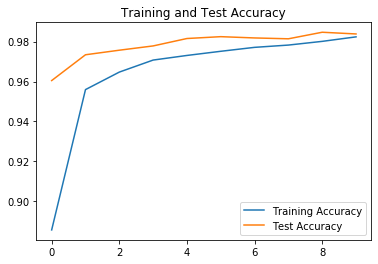

In [8]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Test Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Test Accuracy')
plt.show()

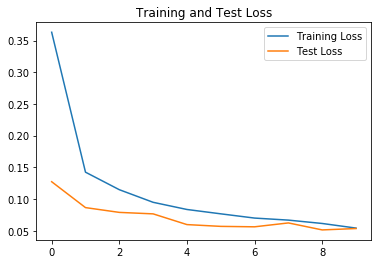

In [9]:
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Test Loss')
plt.legend(loc='upper right')
plt.title('Training and Test Loss')
plt.show()